Завдання 2. Визначення важливих ознак
Завдання полягає в тому, щоб з використанням алгоритмів SVM і Random Forest визначити важливі ознаки в наборі даних.
Необхідно передбачити, чи має пацієнт рак грудей або ні на основі ознак. Використати датасет "Breast Cancer" (рак грудей) з бібліотеки scikit-learn для визначення важливих ознак.
Завдання включає наступні кроки:
1. Завантажити набір даних.
2. Розділити дані на тренувальний та тестовий набори.
3. Застосувати SVM і Random Forest для визначення важливих ознак.
4. Побудувати графік або таблицю, щоб показати важливість кожної
ознаки в аналізі.
5. Обговорити результати та визначити, які ознаки найбільше впливають
на вихідні дані.
6. Обчислити точність для двох алгоритмів і порівняти результати


In [22]:
#1. Завантажити набір даних.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()

# Ознаки датасету cancer
X = cancer.data
# Класи датасету cancer
y = cancer.target

In [23]:
#2. Розділити дані на тренувальний та тестовий набори.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#3. Застосувати SVM і Random Forest для визначення важливих ознак.
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
# Оцінка важливості ознак для SVM
svm_feature_importance = np.abs(svm_classifier.coef_)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
# Оцінка важливості ознак для Random Forest
rf_feature_importance = rf_classifier.feature_importances_

# Сортування індексів за важливістю ознак
svm_sorted_indices = np.argsort(svm_feature_importance[0])
rf_sorted_indices = np.argsort(rf_feature_importance)

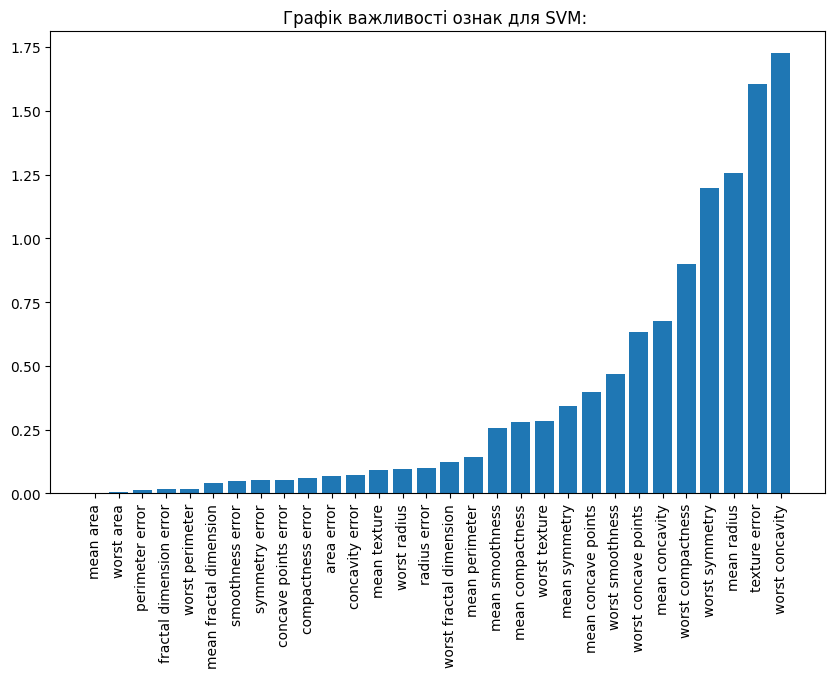

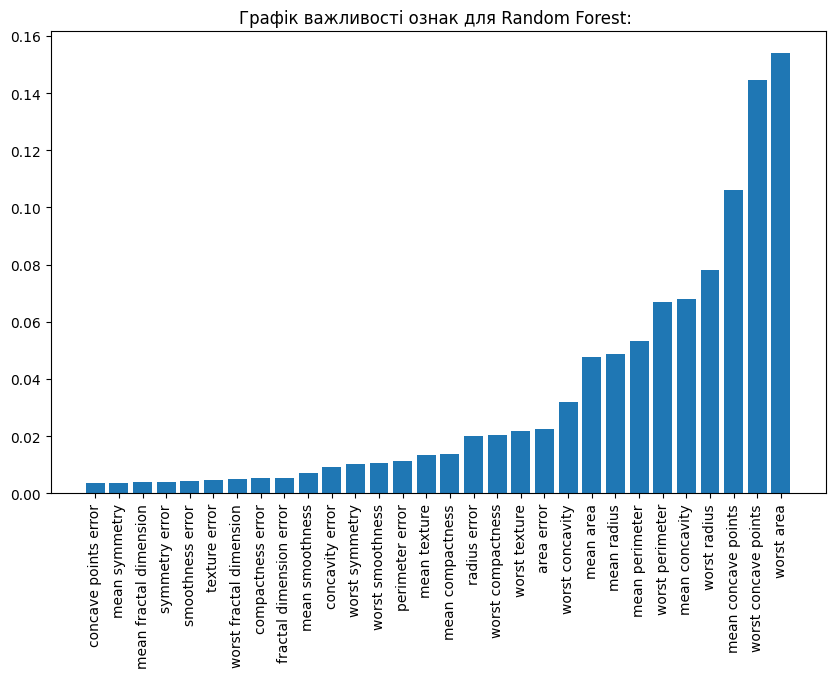

In [26]:
#4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

# Графік важливості ознак для SVM
plt.figure(figsize=(10, 6))
plt.bar(range(len(svm_sorted_indices)), svm_feature_importance[0][svm_sorted_indices])
plt.xticks(range(len(svm_sorted_indices)), np.array(cancer.feature_names)[svm_sorted_indices], rotation=90)
plt.title("Графік важливості ознак для SVM: ")
plt.show()

# Графік важливості ознак для Random Forest
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_sorted_indices)), rf_feature_importance[rf_sorted_indices])
plt.xticks(range(len(rf_sorted_indices)), np.array(cancer.feature_names)[rf_sorted_indices], rotation=90)
plt.title("Графік важливості ознак для Random Forest: ")
plt.show()

In [ ]:
#5. Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.


За отриманими результатами, що зображені на двох графіках, розташованих вище, можу зробити висновок, що важливості ознак та точності для алгоритмів SVM та Random Forest дають змогу визначити, які з ознак найбільше впливають на вихідні дані. Найважливіші з ознак дають більш повну картину даних та необхіднішу інформацію.

In [27]:
#6. Обчислити точність для двох алгоритмів і порівняти результати.
# Передбачення для SVM і Random Forest
svm_predictions = svm_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Точність для SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Точність для Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Точність для алгоритму SVM складає:", svm_accuracy)
print("Точність для алгоритму Random Forest складає:", rf_accuracy)

Точність для алгоритму SVM складає: 0.956140350877193
Точність для алгоритму Random Forest складає: 0.9649122807017544


Висновок:
У процесі виконання другої частини практичної  роботи 6, яка мала за основну мету визначення важливих ознак у наборі даних "Breast Cancer" та передбачення наявності раку грудей з використанням алгоритмів SVM та Random Forest, можу зробити висновок, що:

1. Для алгоритму SVM:
Ознаки були відсортовані за їхньою важливістю для моделі SVM та побудований графік з ознаками найбільшого впливу на визначення наявності раку грудей.

2. Для алгоритму Random Forest:
Ознаки були відсортовані за їхньою важливістю для моделі Random Forest та побудований графік з ознаками найбільшого впливу на визначення наявності раку грудей.

Точність SVM і Random Forest моделей  була обчислена на тестовому наборі даних.За результатами висока точність присутня у двох, отже, вони є високоінформативними та ефективними у використанні.